In [ ]:
from zlib import crc32
import numpy as np

if __name__=='__main__':
    mail = input('enter phystech e-mail\n') 
    to_hash =  mail.strip().split('@')[0]    
    h = crc32(to_hash.encode('utf-8'))
    seed = h%(2**32-1)
    rs = np.random.RandomState(seed)
    task1 = rs.randint(low=1, high=5)
    task2 = rs.randint(low=1, high=5)
    task3 = rs.randint(low=1, high=5)
    task4 = rs.randint(low=1, high=4)
    print ('Your tasks are 1.{}, 2.{}, 3.{}, 4.{}'.format(task1, task2, task3, task4))

Задача 1.2

Выборка: Ирисы Фишера.

Задана выборка описаний 150 экземпляров ириса разных видов. Описание каждого ириса состоит из четырех признаков:

Длина наружной доли околоцветника (англ. sepal length);
Ширина наружной доли околоцветника (англ. sepal width);
Длина внутренней доли околоцветника (англ. petal length);
Ширина внутренней доли околоцветника (англ. petal width).
Требуется определить насколько в среднем различается каждая из этих характеристик между разными видами.

Для каждой из данных характеристик выбрать подходящий размер эффекта из https://en.wikipedia.org/wiki/Effect_size#Types.

Посчитать соответствующее значение.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dataset = load_iris()
data = pd.DataFrame(dataset['data'], columns = ['Sepal Length', 'Sepal Width', 'Petal length', 'Petal Width'])
data['Species'] = dataset['target']
data['Species'] = data['Species'].apply(lambda x: dataset['target_names'][x])

In [ ]:
data.head()

,Sepal Length,Sepal Width,Petal length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.describe()

,Sepal Length,Sepal Width,Petal length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Найдем корреляцию методом Пирсона



In [ ]:
corr = data.corr(method ='pearson')
round(corr,3)

,Sepal Length,Sepal Width,Petal length,Petal Width
Sepal Length,1.000,-0.118,0.872,0.818
Sepal Width,-0.118,1.000,-0.428,-0.366
Petal length,0.872,-0.428,1.000,0.963
Petal Width,0.818,-0.366,0.963,1.000


Построим график зависимости между признаками


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6ae25bd68>,
      dtype=object)

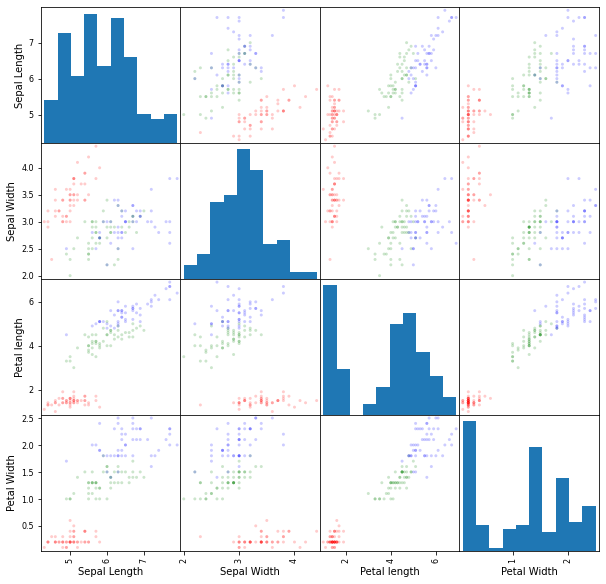

In [ ]:
from pandas.plotting import scatter_matrix
from numpy import array

colors = array(50*['r'] + 50*['g'] + 50*['b'])
scatter_matrix(data, alpha = 0.2, figsize = (10,10), color = colors)

Построим карту зависимости признаков

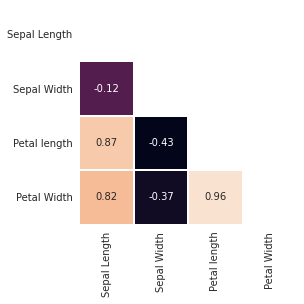

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)

Значения коэффициента корреляции:


*   меньше 0.5 - слабая
*   [0.5, 0.7] - средняя
*   больше 0.7 - высокая
*   больше 0.9 - очень высокая

Видим, что между Petal Length и Petal Width очень сильная зависимость.

Посчитаем стандартное отклонение и среднее значение признаков

In [ ]:
setosa = data[data['Species'] == 'setosa']
versicolor = data[data['Species'] == 'versicolor']
virginica = data[data['Species'] == 'virginica']

In [ ]:
setosa1 = np.mean(setosa)
versicolor1 = np.mean(versicolor)
virginica1 = np.mean(virginica)
print(setosa1)
print(versicolor1)
print(virginica1)

Sepal Length    5.006
Sepal Width     3.428
Petal length    1.462
Petal Width     0.246
dtype: float64
Sepal Length    5.936
Sepal Width     2.770
Petal length    4.260
Petal Width     1.326
dtype: float64
Sepal Length    6.588
Sepal Width     2.974
Petal length    5.552
Petal Width     2.026
dtype: float64


In [ ]:
setosa2 = np.std(setosa)
versicolor2 = np.std(versicolor)
virginica2 = np.std(virginica)
print(setosa2)
print(versicolor2)
print(virginica2)

Sepal Length    0.348947
Sepal Width     0.375255
Petal length    0.171919
Petal Width     0.104326
dtype: float64
Sepal Length    0.510983
Sepal Width     0.310644
Petal length    0.465188
Petal Width     0.195765
dtype: float64
Sepal Length    0.629489
Sepal Width     0.319255
Petal length    0.546348
Petal Width     0.271890
dtype: float64


In [ ]:
def cohend(x, y):
    s1 = np.std(x, ddof=1)
    s2 = np.std(y, ddof=1)
    s = np.sqrt(((len(x)-1)*s1**2 + (len(y)-1)*s2**2) / (len(x) + len(y) - 2))
    d = (np.mean(x) - np.mean(y)) / s
    return d

In [ ]:
cohend(setosa, versicolor)

Sepal Length    1.125833
Sepal Width     0.641152
Petal length    2.520756
Petal Width     2.925073
dtype: float64

In [ ]:
cohend(virginica, setosa)

Sepal Length    3.077239
Sepal Width    -1.290070
Petal length    9.997237
Petal Width     8.557160
dtype: float64

In [ ]:
cohend(virginica, versicolor)

Sepal Length    1.125833
Sepal Width     0.641152
Petal length    2.520756
Petal Width     2.925073
dtype: float64

Из таблицы https://en.wikipedia.org/wiki/Effect_size#Types effect size :

*   меньше 0.2 - маленький
*   до 0.5 - средний
*   до 0.8 - большой
*   больше 1.2 - очень большой

Видим, что в большинстве случаев effect size больше 1.2. Значит, между признаками большие различия. 

